In [1]:
import pandas as pd

In [2]:
data_df = pd.DataFrame(pd.read_csv('PRSA_data_2010.1.1-2014.12.31.csv', index_col = 0))
data_df.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
No,,,,,,,,,,,,
1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [3]:
data_df['datetime'] = pd.to_datetime(data_df[['year', 'month','day', 'hour']])
data_df = data_df.drop(['year', 'month','day', 'hour'], axis = 1)

data_df = data_df[['datetime', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir', 'pm2.5']].iloc[24:].reset_index().drop('No', axis = 1)
data_df[['pm2.5']] = data_df[['pm2.5']].interpolate(method='linear')

In [4]:
data_df.isnull().sum()

datetime    0
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
pm2.5       0
dtype: int64

In [5]:
len(data_df)

43800

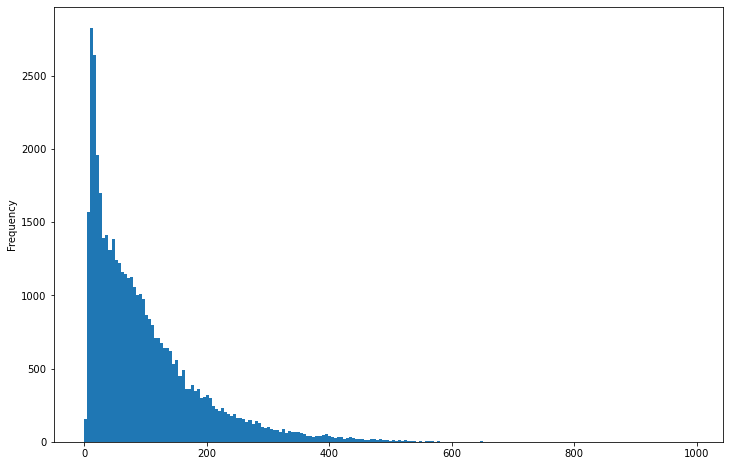

In [6]:
ax = data_df['pm2.5'].plot.hist(bins = 200, figsize = (12,8))

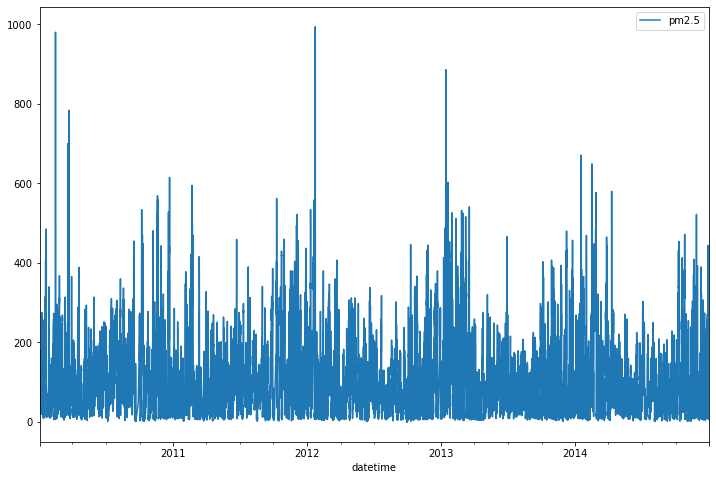

In [7]:
ax = data_df.plot(x = 'datetime', y = 'pm2.5', figsize = (12,8))

In [8]:
data_df[['pm2.5']].mean()

pm2.5    98.244966
dtype: float64

In [9]:
from sklearn.model_selection import train_test_split

data_df = data_df.set_index('datetime')
X_train, X_test, y_train, y_test = train_test_split(data_df[['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']], data_df[['pm2.5']], test_size=0.2)

In [10]:
import statsmodels.api as sm
import numpy as np

model = sm.OLS(np.asarray(y_train), np.asarray(X_train))
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.640
Model:                            OLS   Adj. R-squared (uncentered):              0.640
Method:                 Least Squares   F-statistic:                          1.037e+04
Date:                Tue, 03 May 2022   Prob (F-statistic):                        0.00
Time:                        11:21:54   Log-Likelihood:                     -2.0349e+05
No. Observations:               35040   AIC:                                  4.070e+05
Df Residuals:                   35034   BIC:                                  4.070e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [11]:
from sklearn.metrics import mean_squared_error

y_pred = results.predict(np.asarray(X_test))
mse = mean_squared_error(np.asarray(y_test), y_pred)
rmse = mse**0.5
print(rmse)

79.56122714746543


In [27]:
data_df = data_df.reset_index()
six_df = pd.DataFrame()
twelve_df = pd.DataFrame()
tf_df = pd.DataFrame()
for i in range(len(data_df)):
    six_df = pd.concat([six_df,pd.DataFrame({'6hr_avg':[sum(data_df['pm2.5'].iloc[i:i+6])/6]}, index = [i+6])])
    twelve_df = pd.concat([twelve_df,pd.DataFrame({'12hr_avg':[sum(data_df['pm2.5'].iloc[i:i+12])/12]}, index = [i+12])])
    tf_df = pd.concat([tf_df,pd.DataFrame({'24hr_avg':[sum(data_df['pm2.5'].iloc[i:i+24])/24]}, index = [i+24])])
    
data_df = pd.merge(data_df, six_df, left_index=True, right_index=True)
data_df = pd.merge(data_df, twelve_df, left_index=True, right_index=True)
data_df = pd.merge(data_df, tf_df, left_index=True, right_index=True)

data_df = pd.merge(data_df,pd.get_dummies(data_df['cbwd']), left_index=True, right_index=True)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data_df[['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir','6hr_avg', '12hr_avg', '24hr_avg','NE','NW','SE']], data_df[['pm2.5']], test_size=0.2)

model = sm.OLS(np.asarray(y_train), np.asarray(X_train))
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.920
Model:                            OLS   Adj. R-squared (uncentered):              0.920
Method:                 Least Squares   F-statistic:                          3.337e+04
Date:                Tue, 03 May 2022   Prob (F-statistic):                        0.00
Time:                        11:25:25   Log-Likelihood:                     -1.7674e+05
No. Observations:               35020   AIC:                                  3.535e+05
Df Residuals:                   35008   BIC:                                  3.536e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [14]:
y_pred = results.predict(np.asarray(X_test))

mse = mean_squared_error(np.asarray(y_test), y_pred)
rmse = mse**0.5
print(rmse)

39.76839813123864


In [16]:

from sklearn import tree

In [17]:
data_df = data_df.reset_index()
X_train, X_test, y_train, y_test = train_test_split(data_df[['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir','6hr_avg', '12hr_avg', '24hr_avg','NE','NW','SE']], data_df[['pm2.5']], test_size=0.2)

In [18]:
clf = tree.DecisionTreeRegressor()
clf = clf.fit(np.asarray(X_train), np.asarray(y_train))

In [19]:
y_pred = clf.predict(np.asarray(X_test))


In [20]:
mse = mean_squared_error(np.asarray(y_test), y_pred)
rmse = mse**0.5
print(rmse)

49.114064812585504


In [21]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

dtest = xgb.DMatrix(X_test, y_test, feature_names=X_test.columns)
dtrain = xgb.DMatrix(X_train, y_train,feature_names=X_train.columns)

param = {'verbosity':1, 
         'objective':'reg:squarederror',     ####'reg:squarederror', 
         'booster':'gblinear',
         'eval_metric' :'rmse',
         'feature_selector': 'cyclic',
         'learning_rate': 1}

evallist = [(dtrain, 'train')]

In [22]:
num_round = 20
bst = xgb.train(param, dtrain, num_round, evallist)

[0]	train-rmse:52.82262


C:\Users\karishma\anaconda3\lib\site-packages\xgboost\core.py:525: FutureWarning: Pass `evals` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  warnings.warn(


[1]	train-rmse:48.30743
[2]	train-rmse:43.68695
[3]	train-rmse:42.56760
[4]	train-rmse:41.47118
[5]	train-rmse:40.84749
[6]	train-rmse:40.35245
[7]	train-rmse:40.02159
[8]	train-rmse:39.72600
[9]	train-rmse:39.47814
[10]	train-rmse:39.27433
[11]	train-rmse:39.08336
[12]	train-rmse:38.91499
[13]	train-rmse:38.77191
[14]	train-rmse:38.65335
[15]	train-rmse:38.55502
[16]	train-rmse:38.46540
[17]	train-rmse:38.38469
[18]	train-rmse:38.32457
[19]	train-rmse:38.26603


In [23]:
import xgboost as xgb

dtest = xgb.DMatrix(X_test, y_test, feature_names=X_test.columns)
dtrain = xgb.DMatrix(X_train, y_train,feature_names=X_train.columns)

param = {'verbosity':1, 
         'objective':'reg:squarederror',
         'booster':'gblinear',
         
         'eval_metric' :'rmse',
         'learning_rate': 1}

evallist = [(dtrain, 'train')]

In [24]:
num_round = 20
bst = xgb.train(param, dtrain, num_round, evallist)

[0]	train-rmse:59.44810
[1]	train-rmse:48.20057
[2]	train-rmse:44.95117
[3]	train-rmse:41.38856
[4]	train-rmse:40.27433
[5]	train-rmse:39.80003
[6]	train-rmse:39.50521
[7]	train-rmse:39.30353
[8]	train-rmse:39.17040
[9]	train-rmse:39.04106
[10]	train-rmse:38.87998
[11]	train-rmse:38.74482
[12]	train-rmse:38.66736
[13]	train-rmse:38.58315
[14]	train-rmse:38.51255
[15]	train-rmse:38.45742
[16]	train-rmse:38.41265
[17]	train-rmse:38.37699
[18]	train-rmse:38.33350
[19]	train-rmse:38.29580


In [25]:
y_pred = bst.predict(dtest)

In [26]:
mse = mean_squared_error(np.asarray(y_test), y_pred)
rmse = mse**0.5
print(rmse)

40.435577340525285
